# Exploratory Data Analysis for Telco Customer Churn

## Imports + Libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import sqlite3

## Reading Datasets

In [195]:
conn = sqlite3.connect('../data/churn.db')

In [196]:
demographics = pd.read_sql_query('SELECT * FROM demographics;', conn)
demographics.head()

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,num_dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [197]:
location = pd.read_sql_query('SELECT * FROM location;', conn)
location.head()

,location_id,customer_id,count,country,state,city,zip_code,lat_long,latitude,longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [198]:
population = pd.read_sql_query('SELECT * FROM population;', conn)
population.head()

,population_id,zip_code,pop
0,1,90001,"54,492"
1,2,90002,"44,586"
2,3,90003,"58,198"
3,4,90004,"67,852"
4,5,90005,"43,019"


In [199]:
services = pd.read_sql_query('SELECT * FROM services;', conn)
services.head()

,service_id,customer_id,count,quarter,referred_friend,num_referrals,tenure_months,offer,phone_service,avg_monthly_long_distance_charge,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20.0,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0.0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0.0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0.0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36


In [200]:
status = pd.read_sql_query('SELECT * FROM status;', conn)
status.head()

,status_id,customer_id,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


## Initial Data Exploration, Sanity Checks

In [201]:
demographics.shape, location.shape, population.shape, services.shape, status.shape

((7043, 9), (7043, 10), (1671, 3), (7043, 31), (7043, 12))

Each dataset has 7043 rows, with the exception of the population lookup table (which tracks since population does not have a customer_id foreign key). 

In [202]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   count           7043 non-null   int64 
 2   gender          7043 non-null   object
 3   age             7043 non-null   int64 
 4   under_30        7043 non-null   object
 5   senior_citizen  7043 non-null   object
 6   married         7043 non-null   object
 7   dependents      7043 non-null   object
 8   num_dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [203]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  7043 non-null   object 
 1   customer_id  7043 non-null   object 
 2   count        7043 non-null   int64  
 3   country      7043 non-null   object 
 4   state        7043 non-null   object 
 5   city         7043 non-null   object 
 6   zip_code     7043 non-null   object 
 7   lat_long     7043 non-null   object 
 8   latitude     7043 non-null   float64
 9   longitude    7043 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 550.4+ KB


In [204]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   population_id  1671 non-null   int64 
 1   zip_code       1671 non-null   object
 2   pop            1671 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.3+ KB


In [205]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   service_id                        7043 non-null   object 
 1   customer_id                       7043 non-null   object 
 2   count                             7043 non-null   int64  
 3   quarter                           7043 non-null   object 
 4   referred_friend                   7043 non-null   object 
 5   num_referrals                     7043 non-null   int64  
 6   tenure_months                     7043 non-null   int64  
 7   offer                             3166 non-null   object 
 8   phone_service                     7043 non-null   object 
 9   avg_monthly_long_distance_charge  7043 non-null   float64
 10  multiple_lines                    7043 non-null   object 
 11  internet_service                  7043 non-null   object 
 12  intern

'offer' and 'internet_type' columns contain null values, needs investigation

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_38753/971186895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services_copy['offer'].fillna('No Offer', inplace=True)


<Axes: xlabel='offer'>

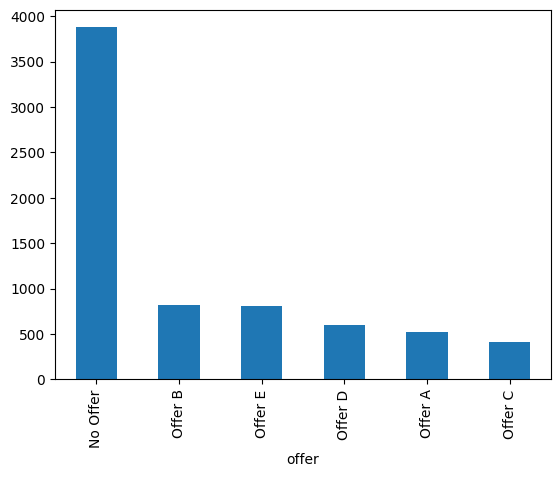

In [206]:
services_copy = services.copy()
services_copy['offer'].fillna('No Offer', inplace=True)
services_copy['offer'].value_counts().plot(kind='bar')

Treating None values as "no offer received," there exists a significant class imbalance between customer's not receiving an offer vs. receiving one of the A-E offers. Will have to dig into the relationship between "offer" and customer churn

In [207]:
# Now investigating 'internet_type' and 'internet_service' features
services['internet_service'].value_counts()

internet_service
Yes    5517
No     1526
Name: count, dtype: int64

In [208]:
services['internet_type'].value_counts().sum()

np.int64(5517)

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_38753/3549508147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services_copy['internet_type'].fillna('No Internet', inplace=True)


<Axes: xlabel='internet_type'>

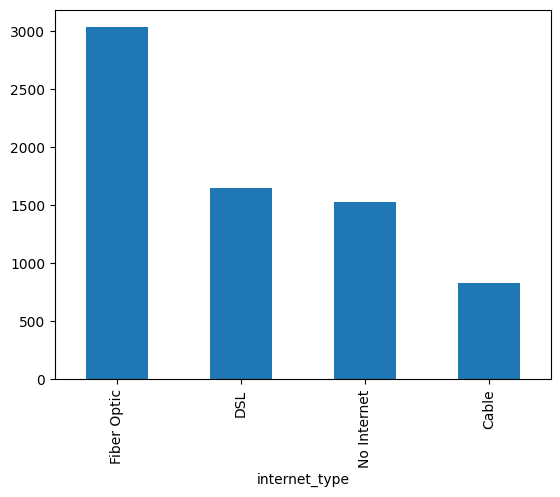

In [209]:
services_copy['internet_type'].fillna('No Internet', inplace=True)
services_copy['internet_type'].value_counts().plot(kind='bar')

In [210]:
services_copy[['internet_service', 'internet_type']].groupby('internet_service').value_counts()

internet_service  internet_type
No                No Internet      1526
Yes               Fiber Optic      3035
                  DSL              1652
                  Cable             830
Name: count, dtype: int64

It appears "No" responses in the 'internet_service' column account for the "None" values in the 'internet_type' column, will treat "None" values as "No Internet"

In [211]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status_id           7043 non-null   object
 1   customer_id         7043 non-null   object
 2   count               7043 non-null   int64 
 3   quarter             7043 non-null   object
 4   satisfaction_score  7043 non-null   int64 
 5   customer_status     7043 non-null   object
 6   churn_label         7043 non-null   object
 7   churn_value         7043 non-null   int64 
 8   churn_score         7043 non-null   int64 
 9   cltv                7043 non-null   int64 
 10  churn_category      1869 non-null   object
 11  churn_reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


'churn_category' and 'churn_reason' have null values, needs investigation

In [212]:
status['churn_category'].value_counts()

churn_category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [213]:
status['churn_reason'].value_counts()

churn_reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [214]:
status_copy = status.copy()
status_copy['churn_category'].fillna('No Churn', inplace=True)
status_copy[['churn_value', 'churn_category']].groupby('churn_value').value_counts()

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_38753/2051236377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  status_copy['churn_category'].fillna('No Churn', inplace=True)


churn_value  churn_category 
0            No Churn           5174
1            Competitor          841
             Attitude            314
             Dissatisfaction     303
             Price               211
             Other               200
Name: count, dtype: int64

It appears "0" values in the 'churn_value' column account for the "None" values in the 'churn_category' column, will treat "None" values as "No Churn"

In [215]:
status_copy['churn_reason'].fillna('No Churn', inplace=True)
status_copy[['churn_category', 'churn_reason']].groupby('churn_category').value_counts()

/var/folders/zj/d482_qjd6szf0_0dg2klzvq80000gn/T/ipykernel_38753/529997248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  status_copy['churn_reason'].fillna('No Churn', inplace=True)


churn_category   churn_reason                             
Attitude         Attitude of support person                    220
                 Attitude of service provider                   94
Competitor       Competitor had better devices                 313
                 Competitor made better offer                  311
                 Competitor offered more data                  117
                 Competitor offered higher download speeds     100
Dissatisfaction  Product dissatisfaction                        77
                 Network reliability                            72
                 Service dissatisfaction                        63
                 Limited range of services                      37
                 Lack of self-service on Website                29
                 Poor expertise of online support               13
                 Poor expertise of phone support                12
No Churn         No Churn                                     5174
Oth

Similarly, the "None" values in 'churn_reason' column are all accounted for by the lack of 'churn_category' and 'churn_value' columns, so we will treat these values as "No Churn"

In [216]:
demographics.isna().sum()

customer_id       0
count             0
gender            0
age               0
under_30          0
senior_citizen    0
married           0
dependents        0
num_dependents    0
dtype: int64

In [217]:
location.isna().sum()

location_id    0
customer_id    0
count          0
country        0
state          0
city           0
zip_code       0
lat_long       0
latitude       0
longitude      0
dtype: int64

In [218]:
population.isna().sum()

population_id    0
zip_code         0
pop              0
dtype: int64

In [219]:
services_copy.isna().sum()

service_id                          0
customer_id                         0
count                               0
quarter                             0
referred_friend                     0
num_referrals                       0
tenure_months                       0
offer                               0
phone_service                       0
avg_monthly_long_distance_charge    0
multiple_lines                      0
internet_service                    0
internet_type                       0
avg_monthly_gb_download             0
online_security                     0
online_backup                       0
device_protection                   0
premium_tech_support                0
streaming_tv                        0
streaming_movies                    0
streaming_music                     0
unlimited_data                      0
contract                            0
paperless_billing                   0
payment_method                      0
monthly_charge                      0
total_charge

In [220]:
status_copy.isna().sum()

status_id             0
customer_id           0
count                 0
quarter               0
satisfaction_score    0
customer_status       0
churn_label           0
churn_value           0
churn_score           0
cltv                  0
churn_category        0
churn_reason          0
dtype: int64

Now we have no null values in the dataset, joining datasets on 'customer_id' column

In [221]:
# Remove 'quarter' and 'count' columns from applicable tables
datasets = [demographics, location, population, services_copy, status_copy]
for i in range(len(datasets)):
    if 'quarter' in datasets[i].columns:
        print(f"{i} 'quarter': {datasets[i]['quarter'].value_counts()}")
    if 'count' in datasets[i].columns:
        print(f"{i} 'count': {datasets[i]['count'].value_counts()}\n")

0 'count': count
1    7043
Name: count, dtype: int64

1 'count': count
1    7043
Name: count, dtype: int64

3 'quarter': quarter
Q3    7043
Name: count, dtype: int64
3 'count': count
1    7043
Name: count, dtype: int64

4 'quarter': quarter
Q3    7043
Name: count, dtype: int64
4 'count': count
1    7043
Name: count, dtype: int64



In [222]:
# Remove 'quarter' and 'count' columns from applicable tables
demographics_copy = demographics.copy()
location_copy = location.copy()
population_copy = population.copy()

datasets = [demographics_copy, location_copy, population_copy, services_copy, status_copy]
for i in range(len(datasets)):
    if 'quarter' in datasets[i].columns:
        datasets[i].drop(columns=['quarter'], inplace=True)
    if 'count' in datasets[i].columns:
        datasets[i].drop(columns=['count'], inplace=True)

Removed 'quarter' and 'count' columns from dataset because 'quarter' is always "Q3" and 'count' is always 1

In [225]:
# Ensure merged on columns are strings
demographics_copy['customer_id'] = demographics_copy['customer_id'].astype(str)
location_copy['customer_id'] = location_copy['customer_id'].astype(str)

# Merge on 'customer_id'
data = pd.merge(
    demographics_copy,
    location_copy,
    on='customer_id',
    how='outer'
)

data['customer_id'] = data['customer_id'].astype(str)
services_copy['customer_id'] = services_copy['customer_id'].astype(str)

# Merge on 'customer_id'
data = pd.merge(
    data,
    services_copy,
    on='customer_id',
    how='outer'
)

status_copy['customer_id'] = status_copy['customer_id'].astype(str)

# Merge on 'customer_id'
data = pd.merge(
    data,
    status_copy,
    on='customer_id',
    how='outer'
)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7043 non-null   object 
 1   gender                            7043 non-null   object 
 2   age                               7043 non-null   int64  
 3   under_30                          7043 non-null   object 
 4   senior_citizen                    7043 non-null   object 
 5   married                           7043 non-null   object 
 6   dependents                        7043 non-null   object 
 7   num_dependents                    7043 non-null   int64  
 8   location_id                       7043 non-null   object 
 9   country                           7043 non-null   object 
 10  state                             7043 non-null   object 
 11  city                              7043 non-null   object 
 12  zip_co

In [226]:
data.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'num_dependents', 'location_id', 'country', 'state',
       'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'service_id',
       'referred_friend', 'num_referrals', 'tenure_months', 'offer',
       'phone_service', 'avg_monthly_long_distance_charge', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'status_id', 'satisfaction_score', 'customer_status',
       'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_category',
       'churn_reason'],
      dtype='object

Now we have a null-free dataset of the demographics, location, services, and status datasets after cleaning

In [308]:
# Save cleaned data to CSV
data.to_csv('../data/processed/non_encoded_churn_v1.csv', index=False)

## EDA

In [227]:
# Remove duplicates
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7043 non-null   object 
 1   gender                            7043 non-null   object 
 2   age                               7043 non-null   int64  
 3   under_30                          7043 non-null   object 
 4   senior_citizen                    7043 non-null   object 
 5   married                           7043 non-null   object 
 6   dependents                        7043 non-null   object 
 7   num_dependents                    7043 non-null   int64  
 8   location_id                       7043 non-null   object 
 9   country                           7043 non-null   object 
 10  state                             7043 non-null   object 
 11  city                              7043 non-null   object 
 12  zip_co

No duplicates, number of rows maintained

### Outlier Detection

Target variable: 'churn_value'  

<Axes: ylabel='Churn Value Distribution:'>

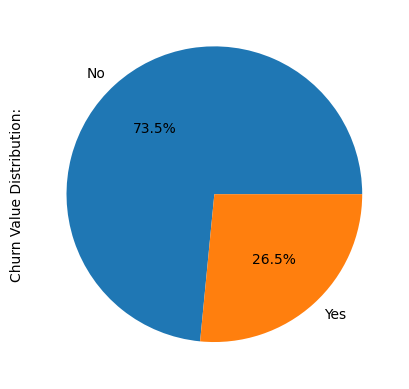

In [242]:
data['churn_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', label='Churn Value Distribution:')

Slight class imbalance favoring customers who have not churned. It will be more significant to identify a customer who does churn or is more likely to in the future.

<Axes: xlabel='gender', ylabel='count'>

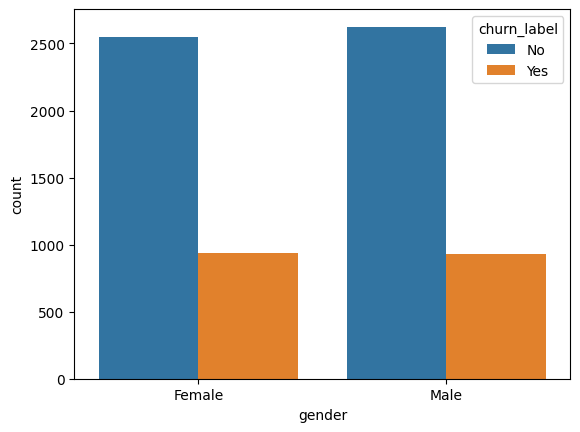

In [257]:
sns.countplot(data=data, x='gender', hue='churn_label')

Gender appears to have little influence on churn counts based on count plot

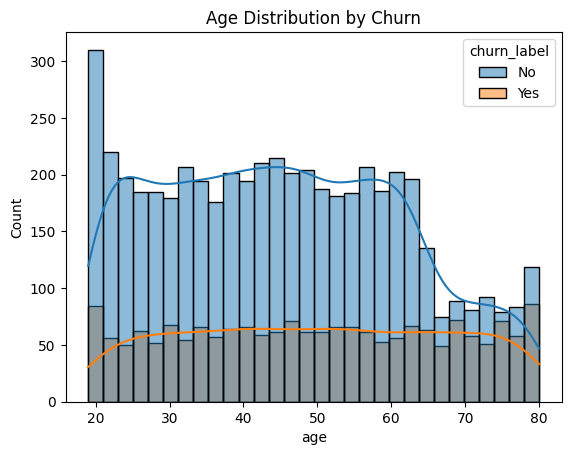

In [261]:
# Age distribution
sns.histplot(data=data, x='age', bins=30, kde=True, hue='churn_label')
plt.title("Age Distribution by Churn")
plt.show()


In [264]:
pd.crosstab(data['senior_citizen'], data['churn_label'], normalize='index')

churn_label,No,Yes
senior_citizen,,
No,0.763938,0.236062
Yes,0.583187,0.416813


A bit more likely to churn as a senior-citizen

In [265]:
pd.crosstab(data['under_30'], data['churn_label'], normalize='index')

churn_label,No,Yes
under_30,,
No,0.722616,0.277384
Yes,0.783012,0.216988


Not much of a difference for those under 30 vs. not

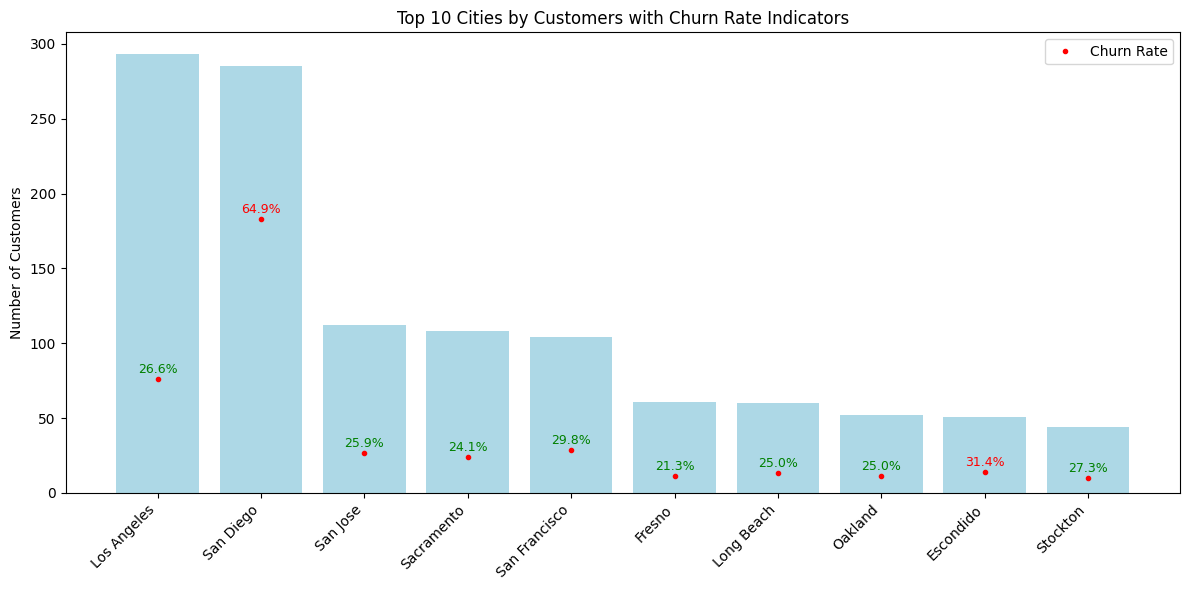

In [ ]:
df = data.copy()

# Group by city: customer count + churn rate
city_churn = (
    df.groupby("city")
      .agg(
          num_customers=("customer_id", "count"),
          churn_rate=("churn_value", "mean")
      )
      .reset_index()
)

# Get the top 10 cities by customer count
top_cities_churn = city_churn.sort_values(by="num_customers", ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(top_cities_churn["city"], top_cities_churn["num_customers"], color="lightblue")

# Add churn rate indicators inside bars
for bar, churn_rate in zip(bars, top_cities_churn["churn_rate"]):
    height = bar.get_height()
    y = height * churn_rate  # position of churn indicator
    x = bar.get_x() + bar.get_width() / 2

    # Place dot
    ax.plot(x, y - 2, 'rD' if churn_rate > top_cities_churn["churn_rate"].mean() else "green", markersize=3)

    # Place label (percentage to first decimal)
    ax.text(x, y, f"{churn_rate:.01%}", ha="center", va="bottom", fontsize=9, 
                        color="red" if churn_rate > top_cities_churn["churn_rate"].mean() else "green")

# Labels and title
ax.set_ylabel("Number of Customers")
ax.set_title("Top 10 Cities by Customers with Churn Rate Indicators")

plt.legend(['Churn Rate'], loc='upper right')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Among the company's top ten cities (by customer count), San Diego's churn rate appears exceptionally high in comparison to other cities.

In [305]:
# Churn by zip code
churn_by_city = data.groupby("city")['churn_value'].mean().sort_values(ascending=False)
print(churn_by_city)


city
Eldridge           1.0
Smith River        1.0
Twain              1.0
Johannesburg       1.0
Riverbank          1.0
                  ... 
Glenn              0.0
Glenhaven          0.0
San Quentin        0.0
North Highlands    0.0
Laguna Hills       0.0
Name: churn_value, Length: 1106, dtype: float64


<Axes: xlabel='monthly_charge', ylabel='Count'>

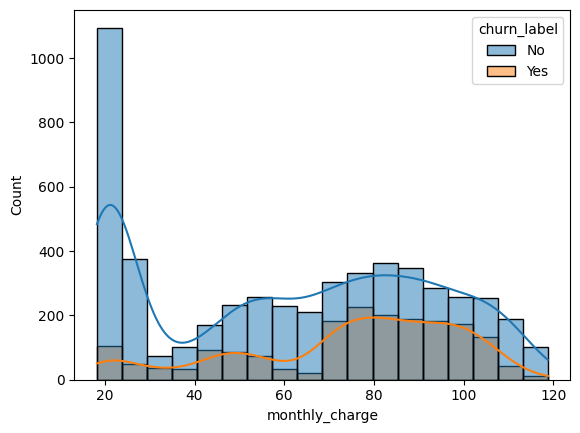

In [246]:
sns.histplot(data=data, x='monthly_charge', hue='churn_label', kde=True)

,customer_id,gender,age,under_30,senior_citizen,married,dependents,num_dependents,location_id,country,...,total_revenue,status_id,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,FUGQUJ6597,United States,...,974.81,UAAWUJ8685,3,Stayed,No,0,65,2205,No Churn,No Churn
1,0003-MKNFE,Male,46,No,No,No,No,0,SIZFEJ5344,United States,...,610.28,URNYXG9268,5,Stayed,No,0,66,5414,No Churn,No Churn
2,0004-TLHLJ,Male,50,No,No,No,No,0,RZDAXJ8786,United States,...,415.45,LOOUCZ6174,1,Churned,Yes,1,71,4479,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,MGKGVM9555,United States,...,1599.51,HDYLOW1467,1,Churned,Yes,1,91,3714,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,FJLSME1564,United States,...,289.54,EICWUI5128,1,Churned,Yes,1,68,3464,Dissatisfaction,Network reliability
